In [1]:
import random
import time
from copy import copy

import cv2
import numpy as np
from ipycanvas import Canvas, hold_canvas
from IPython.display import clear_output, display
from PIL import Image

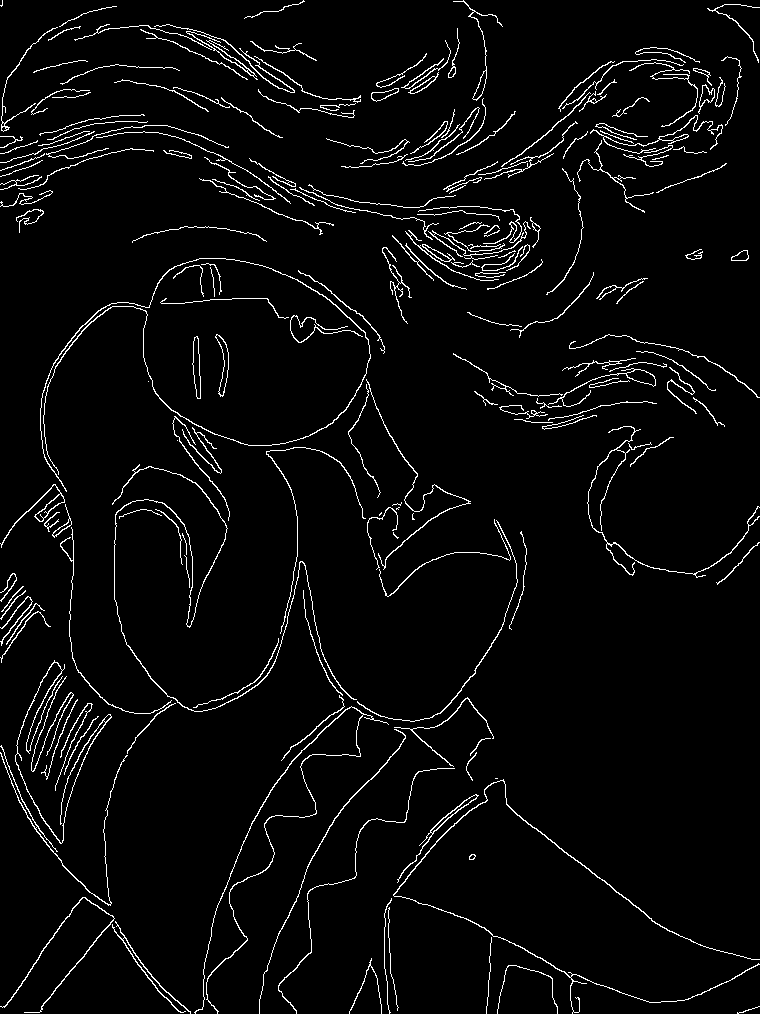

In [2]:
image = cv2.imread("Peace-art.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
mid = cv2.Canny(blurred, 30, 150)
display(Image.fromarray(mid))

In [3]:
world_width = image.shape[1]-1
world_height = image.shape[0]-1
canvas = Canvas(width=world_width, height=world_height)
canvas.fill_style = "black"
canvas.fill_rect(0, 0, world_width, world_height)

In [4]:
def analyze(c,u,d,l,r):
    scores={
       'up': u+random.randint(0,5),
        'down':d+random.randint(0,5),
        'left':l+random.randint(0,5),
        'right':r+random.randint(0,5)
    }
    top =  max(scores, key=lambda e: scores.get(e))
    if abs(scores[top] -c) < 5:
        return None
    return top

analyze(10,11,15,13,21)

'right'

In [5]:
class Crawler:
    def __init__(self, x, y, base_color=None):
        self.x = x
        self.y = y

        self.ox = copy(x)
        self.oy = copy(y)
        self.life = 500

    def run(self, world):
        global blurred,image
        updates = {}
        
        valid = False
        # print(blurred.shape,self.y,self.x)
        current = blurred[self.y][self.x] 
        if current > 20:
            r,g,b = image[self.y][self.x]
            updates[(self.x, self.y)] = f"rgba({r},{g},{b},0.2)"

        up = mid[self.y-1][self.x] if (self.y-1 < world_height and self.y-1 >0 and self.x < world_width and self.x > 0 ) else 0
        down = mid[self.y+1][self.x] if (self.y+1< world_height and self.y-1 >0 and self.x < world_width and self.x > 0 ) else 0
        left = mid[self.y][self.x+1] if (self.y < world_height and self.y >0 and self.x+1 < world_width and self.x+1 > 0 ) else 0
        right = mid[self.y][self.x-1] if (self.y < world_height and self.y >0 and self.x-1 < world_width and self.x-1 > 0 ) else 0
        mode = analyze(current,up,down,left,right)

        if mode == 'up':
            self.x += 0
            self.y += -1
            
        elif mode  == 'left':
            self.x += 1
            self.y += 0
            
        elif mode == 'right':
            self.x += -1
            self.y += 0
            
        elif mode == 'down':
            self.x += 0
            self.y += 1
        
        if self.life >0:
            self.life -= 1
        else:
            self.life = 500
            self.x = random.randint(0,world_width)
            self.y = random.randint(0,world_height)

        if self.y < 0:
            self.y = world_height

        if self.y > world_height:
            self.y = 0

        if self.x < 0:
            self.x = world_width

        if self.x > world_width:
            self.x = 0

        if self.x <= 0:
            self.x = world_width
        if current > 20:
            r,g,b = image[self.y][self.x]
            updates[(self.x, self.y)] = f"rgb({r},{g},{b})"
        valid = False
        return updates

In [6]:
pallets = []

In [7]:
# hex
html_colors = "#c7522a, #e5c185, #fbf2c4, #74a892, #008585"

In [8]:
html_colors = "#d1dbe4, #a3b7ca, #7593af, #476f95,  #194a7a"

In [9]:
html_colors = "#003f5c,  #58508d,  #bc5090,  #ff6361 ,  #ffa600"

In [10]:
html_colors = "#cac7ff,  #d7cdfe,  #e4d3fc,  #f1dafb ,  #fee0f9"

In [11]:
#
html_colors = " #d9042b,  #730220,  #03658c,  #f29f05,  #f27b50."

In [12]:
html_colors = "#02a5ff,  #ff3300,  #66cc33 ,#ffcc00"

In [13]:
html_colors = "#d6e6ff,  #d7f9f8,  #ffffea,  #fff0d4,  #fbe0e0 ,#e5d4ef"

In [14]:
html_colors = " #2b2dc4,  #3639f7,  #090a2b,  #15165e,#202191,#ffa600"

In [15]:
hexes = [i.strip().strip("#") for i in html_colors.strip().split(",")]
pallets.extend([tuple(int(h[i : i + 2], 16) for i in (0, 2, 4)) for h in hexes])

In [16]:
class World:
    data = {}
    actors = []
    data_since_last_update = {}

    def __init__(self, width, height):
        self.width = width
        self.height = height

    def update(self, update_data):
        self.data.update(update_data)
        self.data_since_last_update.update(update_data)

    def updateCanvas(self, canvas):
        for loc in self.data_since_last_update:
            x, y = loc
            canvas.fill_style = self.data_since_last_update[loc]
            canvas.fill_rect(x, y, 1, 1)
        self.data_since_last_update = {}

In [17]:
ppi = 50
world = World(world_width, world_height)
for y in range(1,ppi):
    for x in range(1,ppi):
        world.actors.append(
            Crawler(
                int((world_width /ppi) *x),
                int((world_height / ppi)*y)
            )
)

In [18]:
def update(world):
    for ap in world.actors:
        world.update(ap.run(world))
    world.updateCanvas(canvas)

In [19]:
display(canvas)
update(world)

Canvas(height=1013, width=759)

In [20]:
import ipywidgets as widgets

count = 0
out = widgets.Output(layout={"border": "1px solid white"})
out

Output(layout=Layout(border='1px solid white'))

In [ ]:
while count < 6000:
    with hold_canvas(canvas):
        # Clear the old animation step
        # canvas.clear()
        update(world)
        count += 1
        if count % 100 == 0:
            out.clear_output()
            with out:
                print(count)
    # Animation frequency ~50Hz = 1./50. seconds
    time.sleep(0.001)

In [ ]:
canvas.sync_image_data = True
time.sleep(1)
canvas.to_file(f"{time.time()}.png")
canvas.sync_image_data = False